  Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV    Male   78       No            Yes      No         No   
1  7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ  Female   80       No            Yes     Yes        Yes   

   Number of Dependents        Country       State  ...  \
0                     0  United States  California  ...   
1                     1  United States  California  ...   
2                     3  United States  California  ...   
3                     1  United States  California  ...   
4                     1  United States  California  ...   

  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                       20                         0.00          59.65   
1                        0                       390.80   

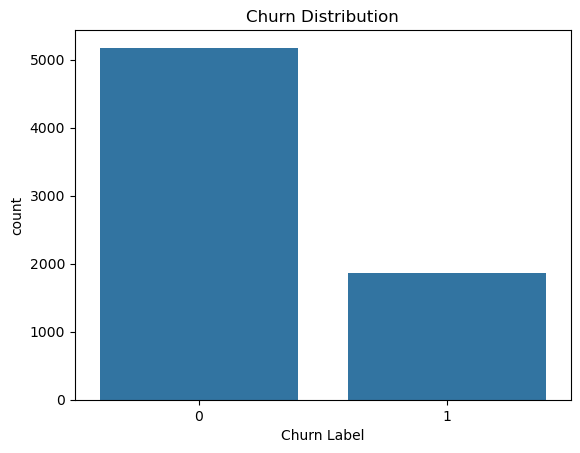

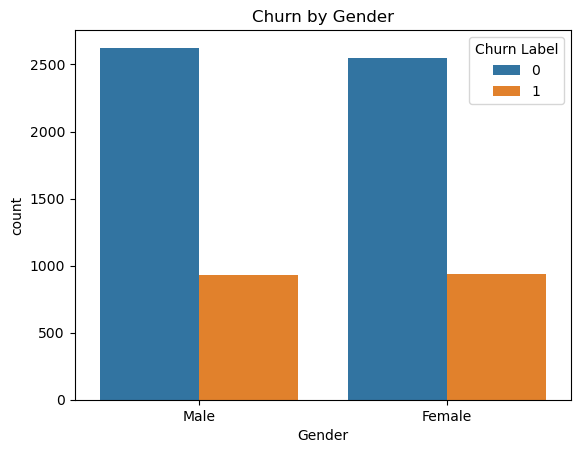

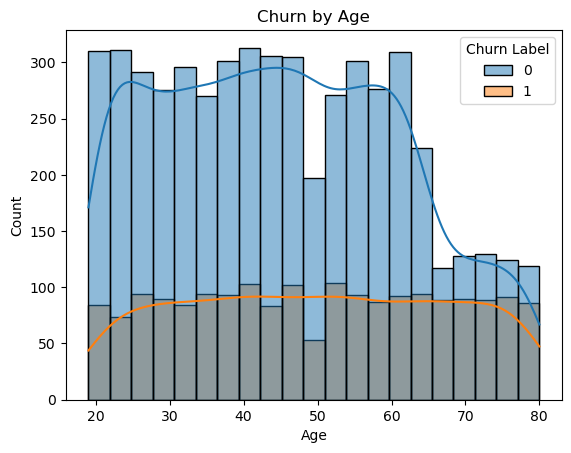

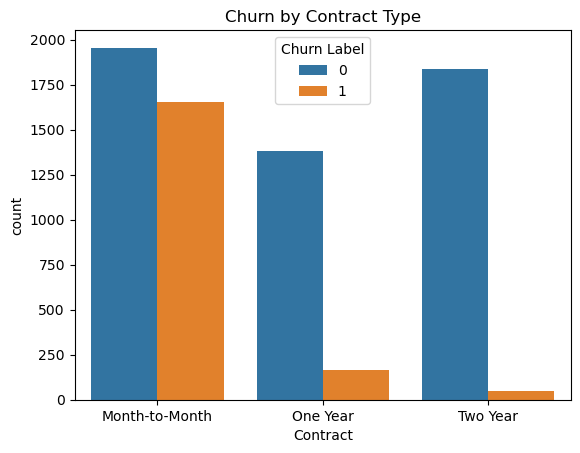

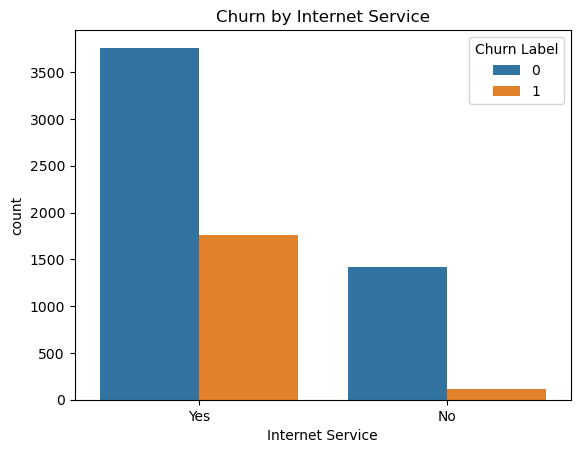

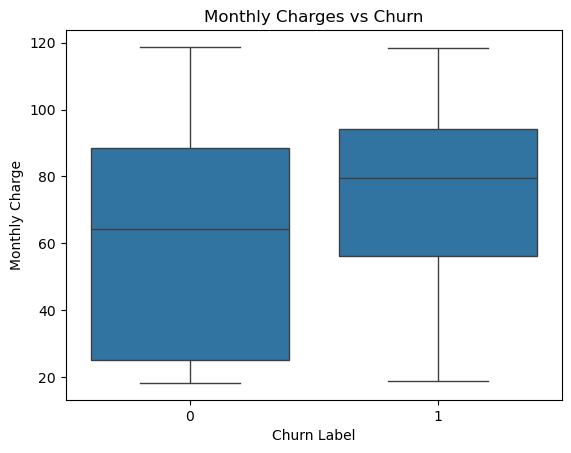

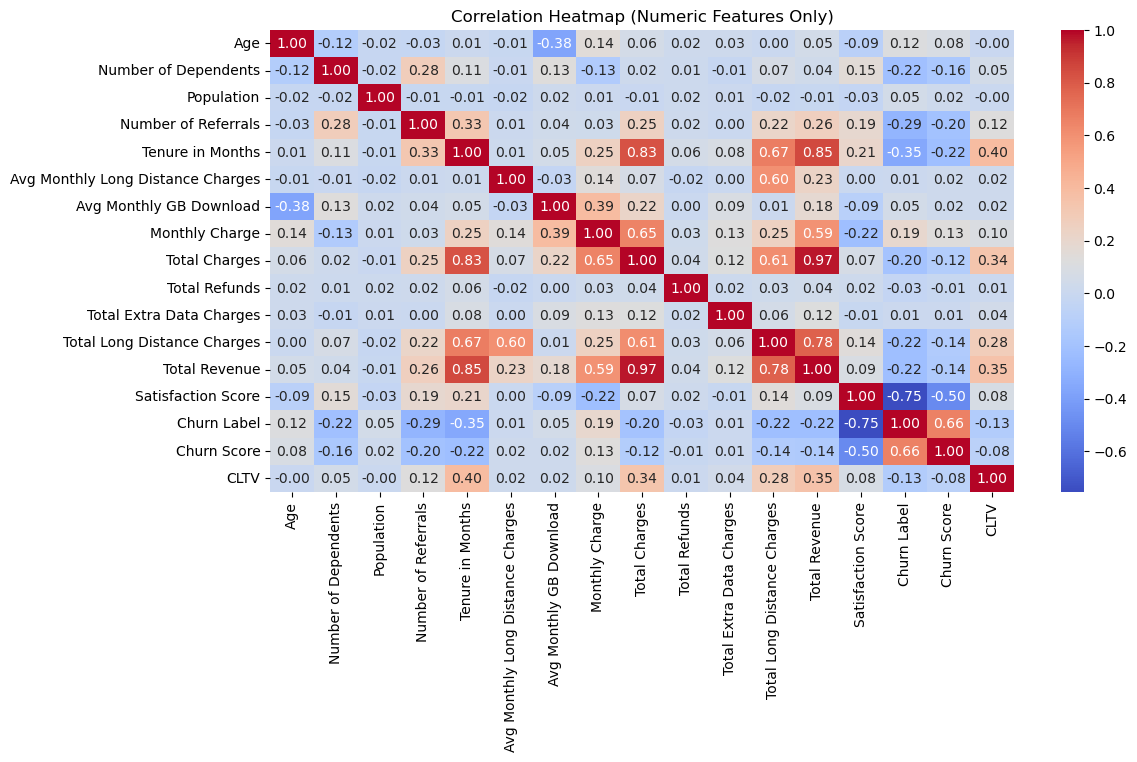

Training set shape: (5634, 46)
Test set shape: (1409, 46)
Training set shape: (5634, 46)
Test set shape: (1409, 46)
=== Logistic Regression ===
Accuracy: 0.9843860894251242
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1035
           1       0.98      0.96      0.97       374

    accuracy                           0.98      1409
   macro avg       0.98      0.98      0.98      1409
weighted avg       0.98      0.98      0.98      1409

Confusion Matrix:
 [[1027    8]
 [  14  360]]

--------------------------------------------------

=== Random Forest ===
Accuracy: 0.985805535841022
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1035
           1       0.99      0.96      0.97       374

    accuracy                           0.99      1409
   macro avg       0.99      0.98      0.98      1409
weighted avg       0.99      0.

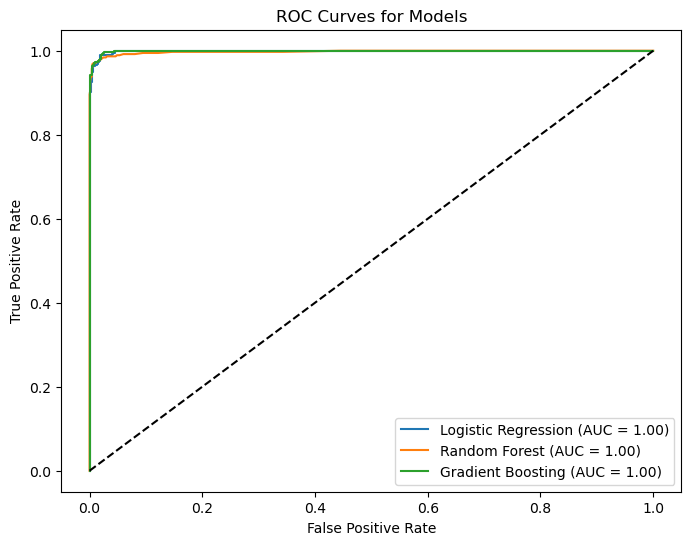

C:\Users\Sadia\AppData\Local\Temp\ipykernel_2340\1060653554.py:183: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")


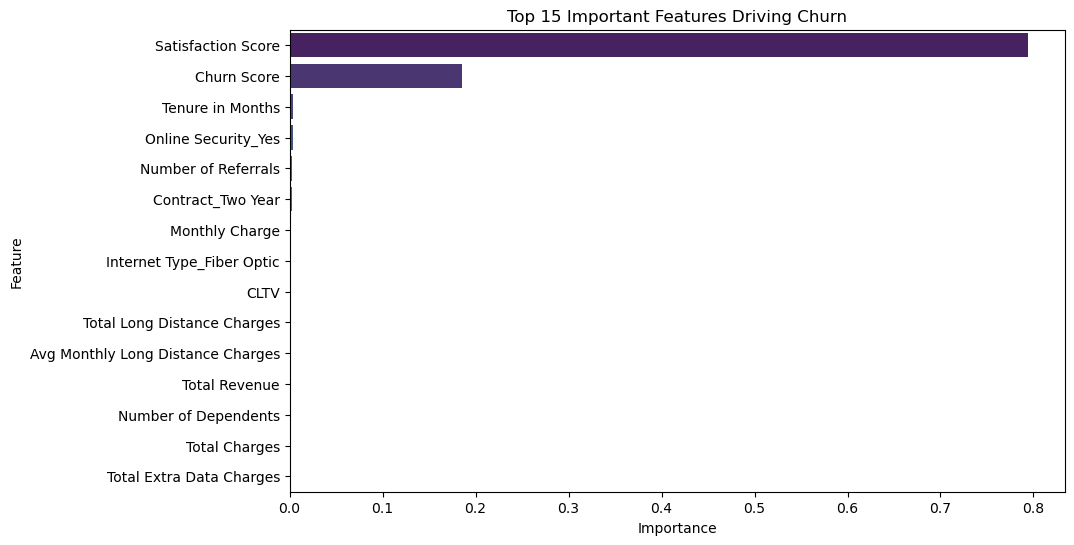


Key Insights from Customer Churn Analysis:

1. Customers on **month-to-month contracts** are far more likely to churn compared to those on longer-term contracts. 
2. **High monthly charges** increase churn probability, especially when combined with low tenure. 
3. Customers with **fiber optic internet** and multiple add-on services also showed higher churn. 
4. Senior citizens and customers with no dependents had a slightly higher churn rate.
5. Gradient Boosting performed best (highest AUC), making it suitable for deployment.

Conclusion:
The business can reduce churn by promoting long-term contracts, offering discounts to high-charge customers, and providing loyalty benefits to new users within their first year.



In [20]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Sadia\Downloads\telco.csv")
print(df.head())
print("Shape:", df.shape)
print(df.info())

#Data Cleaning

print(df.isnull().sum()) #missing values per column
print((df.isnull().sum() / len(df))*100) #percentage of missing values

drop_cols = [
    'Customer ID', 'Country', 'State', 'City', 'Zip Code', 'Latitude', 'Longitude',
    'Customer Status', 'Churn Category', 'Churn Reason'
]
df = df.drop(columns=drop_cols)  #dropping unneccessary columns

df['Offer'] = df['Offer'].fillna('No Offer')
df['Internet Type'] = df['Internet Type'].fillna('No Internet') #handling missing values

df['Churn Label'] = df['Churn Label'].map({'Yes': 1, 'No': 0})  #encoding target variable

print(df.isnull().sum())   
print(df.shape)   


#EXPLORATORY DATA ANALYSIS
 #Churn Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn Label', data=df)
plt.title("Churn Distribution")
plt.show()

 #Churn by demographics 
sns.countplot(x='Gender', hue='Churn Label', data=df)
plt.title("Churn by Gender")
plt.show()

sns.histplot(data=df, x='Age', hue='Churn Label', kde=True)
plt.title("Churn by Age")
plt.show()

 #Churn by Service & Contract
sns.countplot(x='Contract', hue='Churn Label', data=df)
plt.title("Churn by Contract Type")
plt.show()

sns.countplot(x='Internet Service', hue='Churn Label', data=df)
plt.title("Churn by Internet Service")
plt.show()

 #Churn vs Charges
sns.boxplot(x='Churn Label', y='Monthly Charge', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

 #Correlation with Numeric Features
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

#DATA PREPROCESSING

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Fix Total Charges column if needed
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")
df["Total Charges"] = df["Total Charges"].fillna(df["Total Charges"].median())

# Encode churn label (Yes=1, No=0)
le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn Label"])

# Drop the original churn label (not needed anymore)
df = df.drop("Churn Label", axis=1)

# Select categorical columns
cat_cols = df.select_dtypes(include=["object"]).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Define features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Split train & test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

#Split data into train & test sets + Scale features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df.drop("Churn", axis=1)   # all features except target
y = df["Churn"]                # target

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numerical features (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

#Train baseline ML models & evaluate them

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train & evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n" + "-"*50 + "\n")

#ROC-AUC Curve (Model Comparison)
from sklearn.metrics import roc_auc_score, roc_curve

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Re-fit models on scaled data
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

plt.figure(figsize=(8,6))

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Models")
plt.legend()
plt.show()

#Feature Importance (Tree-Based Models)
importances = models["Gradient Boosting"].feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Top 15 Important Features Driving Churn")
plt.show()

#CONCLUSION
print("""
Key Insights from Customer Churn Analysis:

1. Customers on **month-to-month contracts** are far more likely to churn compared to those on longer-term contracts. 
2. **High monthly charges** increase churn probability, especially when combined with low tenure. 
3. Customers with **fiber optic internet** and multiple add-on services also showed higher churn. 
4. Senior citizens and customers with no dependents had a slightly higher churn rate.
5. Gradient Boosting performed best (highest AUC), making it suitable for deployment.

Conclusion:
The business can reduce churn by promoting long-term contracts, offering discounts to high-charge customers, and providing loyalty benefits to new users within their first year.
""")
